In [20]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

In [11]:
from moexalgo import Market, Ticker
from datetime import date, datetime, timedelta
import time

# Загрузка данных

## Ежедневные загрузки

In [1]:
from moexalgo import Ticker
from datetime import datetime, timedelta
import pandas as pd

TICKER = 'YNDX'

yesterday = datetime.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

loader = Ticker(TICKER)
one_day_df = loader.tradestats(date=yesterday, till_date=yesterday)
#one_day_df = pd.DataFrame(one_day_df)

if one_day_df.shape[0] > 0:
    print(yesterday, TICKER, one_day_df.shape)
    one_day_df.to_pickle(f"data/raw/{yesterday.replace('-','')}_{TICKER}.pkl")
else:
    print(yesterday, TICKER, 'Данных нет')

2023-12-08 YNDX (104, 23)


## История

In [3]:
from moexalgo import Ticker
from datetime import date, timedelta
import pandas as pd
import time

TICKER='YNDX'
loader = Ticker(TICKER)

load_date = date(2023, 1, 1)
end_date = date(2023, 12, 8)

while load_date <= end_date:
    date_str = load_date.strftime("%Y-%m-%d")

    one_day_df = loader.tradestats(date=date_str, till_date=date_str)
    #one_day_df = pd.DataFrame(one_day_df)

    if one_day_df.shape[0] > 0:
        print(date_str, TICKER, one_day_df.shape)
        one_day_df.to_pickle(f"data/raw/{date_str.replace('-','')}_{TICKER}.pkl")
    else:
        print(load_date, TICKER, 'Данных нет')
        
    load_date += timedelta(days=1)
    time.sleep(3)

2023-12-01 YNDX (104, 23)
2023-12-02 YNDX Данных нет
2023-12-03 YNDX Данных нет
2023-12-04 YNDX (104, 23)
2023-12-05 YNDX (104, 23)
2023-12-06 YNDX (104, 23)
2023-12-07 YNDX (104, 23)
2023-12-08 YNDX (104, 23)


# Препроцессинг

Загружаем все данные.

In [65]:
import pandas as pd
import glob

all_files = glob.glob('../data/raw/*.pkl')

df = []
for filename in all_files:
    tdf = pd.read_pickle(filename)
    df.append(tdf)
df = pd.concat(df, axis=0, ignore_index=True)
df['tradedate'] = pd.to_datetime(df['ts']).dt.date
df['tradetime'] = pd.to_datetime(df['ts']).dt.time

df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,trades_b,vol_b,val_b,pr_vwap_b,trades_s,vol_s,val_s,pr_vwap_s,tradedate,tradetime
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,174,2453,4477160.0,1825.2,63,1133,2065844.0,1823.3,2023-01-03,10:05:00
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,95,1370,2505360.0,1828.7,47,1056,1929068.0,1826.8,2023-01-03,10:10:00
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,44,381,695113.0,1824.4,27,167,304559.0,1823.7,2023-01-03,10:15:00
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,187,1570,2872988.0,1829.9,77,1015,1857655.0,1830.2,2023-01-03,10:20:00
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,149,2699,4913530.0,1820.5,308,8885,16156931.0,1818.5,2023-01-03,10:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,54,804,1897691.0,2360.3,50,781,1842707.0,2359.4,2023-12-08,18:20:00
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,26,427,1006529.0,2357.2,31,353,832237.0,2357.6,2023-12-08,18:25:00
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,33,313,738774.0,2360.3,30,339,800253.0,2360.6,2023-12-08,18:30:00
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,35,751,1768991.0,2355.5,78,2159,5087607.0,2356.5,2023-12-08,18:35:00


In [66]:
df.sample(7).T

,17809,9556,1009,22344,19178,9391,14455
secid,YNDX,YNDX,YNDX,YNDX,YNDX,YNDX,YNDX
ts,2023-09-06 12:10:00,2023-05-16 17:45:00,2023-01-16 16:10:00,2023-11-06 17:25:00,2023-09-25 13:35:00,2023-05-15 12:40:00,2023-07-21 18:40:00
pr_open,2685.4,2034.0,1945.6,2631.4,2388.0,2034.4,2525.0
pr_high,2686.0,2034.8,1945.6,2632.0,2392.8,2035.0,2527.2
pr_low,2676.4,2034.0,1944.8,2630.4,2386.6,2033.0,2523.0
pr_close,2679.0,2034.8,1944.8,2632.0,2391.2,2033.0,2525.6
pr_change,-0.2383,0.0393,-0.0411,0.0228,0.134,-0.0688,0.0238
trades,919,38,78,56,155,106,83
vol,18676,262,453,328,2010,1863,1275
val,50054626.0,533029.0,881124.0,863137.0,4804827.0,3790015.0,3219847.0


## Фичи

In [67]:
df['pr_mean'] = df[['pr_high','pr_low']].mean(axis=1)

Отношение к последнему часу

In [68]:
for i in range(1,11+1):
    df[f'ratio_pr_mean_{i}'] = df['pr_mean'] / df['pr_mean'].shift(i)
df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,ratio_pr_mean_2,ratio_pr_mean_3,ratio_pr_mean_4,ratio_pr_mean_5,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,1.000658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,1.001807,1.003345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,0.997479,0.996605,0.998135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,0.999788,1.000085,0.999365,1.000763,1.002081,1.000976,0.998561,0.999026,0.998603,0.998096
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,0.998856,0.999153,0.999449,0.998729,1.000127,1.001444,1.000339,0.997926,0.998391,0.997968
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,1.000254,0.999746,1.000042,1.000339,0.999619,1.001018,1.002336,1.001230,0.998815,0.999280
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,0.999873,0.999237,0.998729,0.999025,0.999322,0.998602,1.000000,1.001317,1.000212,0.997799


Прошлый час

In [69]:
for a in ['min','max','mean','std']:
    df[f'hour_{a}'] = df.groupby('tradedate')['pr_mean'].transform(
        lambda s: s.shift(1).rolling(11).agg(a))
df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,1.002081,1.000976,0.998561,0.999026,0.998603,0.998096,2354.5,2363.9,2360.081818,2.817736
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,1.000127,1.001444,1.000339,0.997926,0.998391,0.997968,2354.5,2362.8,2359.672727,2.518766
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,0.999619,1.001018,1.002336,1.001230,0.998815,0.999280,2354.5,2362.8,2359.236364,2.352136
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,0.999322,0.998602,1.000000,1.001317,1.000212,0.997799,2354.5,2362.8,2359.081818,2.226575


Прошлый день

In [70]:
agg_temp = df.groupby('tradedate')['pr_mean'].agg(['min','max','mean','std'])
agg_temp.columns = [f'ytd_{col}' for col in agg_temp.columns]
agg_temp = agg_temp.reset_index()
agg_temp['tradedate'] = agg_temp['tradedate'] + timedelta(days=1)

df = df.merge(agg_temp, on='tradedate', how='left')
df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,0.998603,0.998096,2354.5,2363.9,2360.081818,2.817736,2308.3,2364.1,2344.300962,9.129016
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,0.998391,0.997968,2354.5,2362.8,2359.672727,2.518766,2308.3,2364.1,2344.300962,9.129016
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,0.998815,0.999280,2354.5,2362.8,2359.236364,2.352136,2308.3,2364.1,2344.300962,9.129016
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,1.000212,0.997799,2354.5,2362.8,2359.081818,2.226575,2308.3,2364.1,2344.300962,9.129016


Прошлый месяц

In [71]:
month_temp = df['pr_mean'].rolling(3120).agg(['min','max','mean','std'])
month_temp.columns = [f'month_{col}' for col in month_temp.columns]
month_temp['tradedate'] = df['tradedate']
month_temp['tradetime'] = df['tradetime']
month_temp['tradedate'] = month_temp['tradedate'].shift(-1)

month_temp = month_temp.groupby('tradedate').nth(0)
month_temp = month_temp.iloc[:,:-1]

df = df.merge(month_temp, on='tradedate', how='left')
df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,2360.081818,2.817736,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,2359.672727,2.518766,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,2359.236364,2.352136,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,2359.081818,2.226575,2308.3,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832


## Таргет

In [72]:
from scipy.signal import find_peaks

# Дистанция между пикам/впадинами
dist = 5

# Считаем пики
peaks, _ = find_peaks(df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['peak'] = 1
df = df.join(temp)
df['peak'] = df['peak'].fillna(0).astype(int)

# Считаем впадины
peaks, _ = find_peaks(0 - df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['trough'] = 2
df = df.join(temp)
df['trough'] = df['trough'].fillna(0).astype(int)

# Формируем таргет
df['target'] = df[['trough','peak']].max(axis=1)

df

,secid,ts,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,...,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std,peak,trough,target
0,YNDX,2023-01-03 10:05:00,1817.2,1830.0,1817.0,1822.4,0.2862,237,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,YNDX,2023-01-03 10:10:00,1824.0,1830.0,1822.6,1824.8,0.0439,142,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,YNDX,2023-01-03 10:15:00,1825.0,1826.8,1822.6,1826.8,0.0986,71,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,YNDX,2023-01-03 10:20:00,1825.6,1833.6,1825.6,1829.4,0.2082,264,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,YNDX,2023-01-03 10:25:00,1827.8,1829.0,1811.2,1816.6,-0.6128,457,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,YNDX,2023-12-08 18:20:00,2360.0,2361.8,2357.0,2357.0,-0.1271,104,1585,3740399.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0
24642,YNDX,2023-12-08 18:25:00,2357.2,2358.8,2357.0,2358.8,0.0679,57,780,1838766.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,2,2
24643,YNDX,2023-12-08 18:30:00,2358.8,2361.2,2358.8,2361.0,0.0933,63,652,1539027.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0
24644,YNDX,2023-12-08 18:35:00,2361.0,2361.0,2354.2,2354.4,-0.2795,113,2910,6856599.0,...,2364.1,2344.300962,9.129016,2308.3,2762.2,2583.855064,89.937832,0,0,0


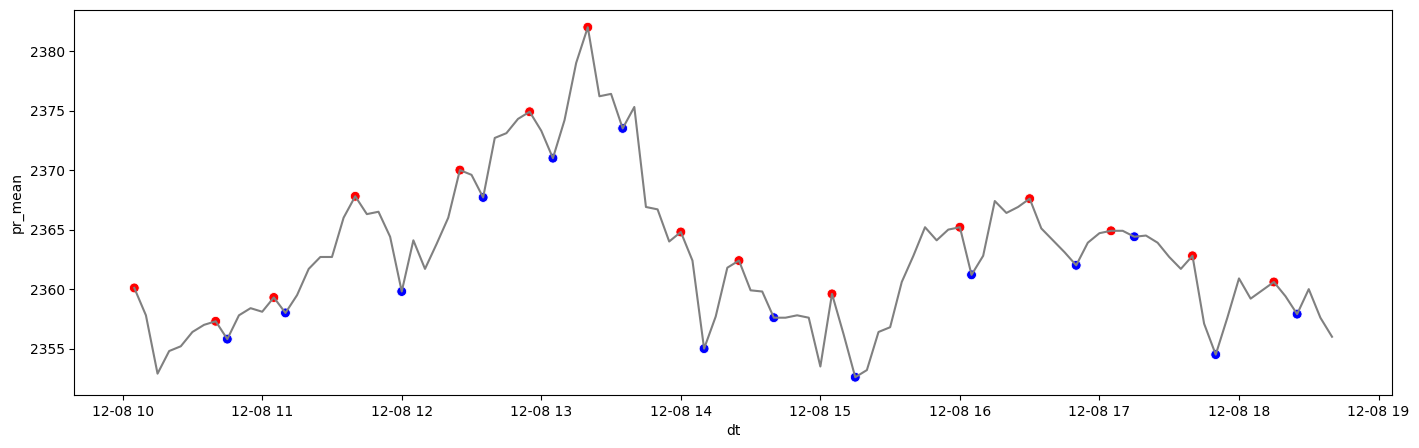

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = df[['tradedate','tradetime','target','pr_mean']][-104:]
temp['dt'] = df['tradedate'].astype(str) + ' ' + df['tradetime'].astype(str)
temp['dt'] = pd.to_datetime(temp['dt'])

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);

## Сохранение

Удалим пустые значения.

In [75]:
df = df[df['tradetime'].astype(str) > '11']
df = df.dropna(subset=['month_mean','ytd_mean'])

Сохраним датасет.

In [77]:
today = datetime.today().strftime('%Y-%m-%d')
df.to_pickle(f"../data/processed/{today.replace('-','')}_{ticker}.pkl")

# Агрегаты для предсказания

Подготовим данные за последний день и последжний месяц, которы бедуем цеплять при предсказании.

In [31]:
agg_temp = df.groupby('tradedate')['pr_mean'].agg(['min','max','mean','std'])
agg_temp.columns = [f'ytd_{col}' for col in agg_temp.columns]
agg_temp = agg_temp[-1:]
agg_temp = agg_temp.reset_index(drop=True)

agg_temp

,ytd_min,ytd_max,ytd_mean,ytd_std
0,2352.6,2382.0,2363.66129,6.018288


In [34]:
month_temp = df[:3120][['pr_mean']].agg(['min','max','mean','std']).T
month_temp.columns = [f'month_{col}' for col in month_temp.columns]
month_temp = month_temp.reset_index(drop=True)

month_temp

,month_min,month_max,month_mean,month_std
0,1815.9,2039.5,1942.53,48.199487


In [35]:
ytd_month = pd.concat([agg_temp,month_temp], axis=1)
ytd_month.to_pickle(f'../data/interim/{datetime.today().strftime("%Y-%m-%d").replace("-","")}_part.pkl')

# Обучение

In [78]:
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

## Датасет

In [81]:
today = datetime.today().strftime('%Y-%m-%d')
df = pd.read_pickle(f"../data/processed/{today.replace('-','')}_{ticker}.pkl")
df = df.fillna(0)

drop_cols = ['ticker','secid','ts','tradedate','tradetime','systime','peak','trough','target']
f_cols = [col for col in df.columns if col not in drop_cols]

last_day = str(df['tradedate'].max())
train = df[df['tradedate'].astype('str') < last_day]
test = df[df['tradedate'].astype('str') == last_day]

X_train, y_train = train[f_cols], train['target']
X_test, y_test = test[f_cols], test['target']

print(X_train.shape, X_test.shape)
print(y_train.mean() * 100, y_test.mean() * 100)

(14972, 43) (93, 43)
37.88405022709057 41.935483870967744


## CV

In [82]:
params = {
    'n_estimators ': [100],
    'learning_rate ': [0.9, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1],
    #'max_depth ': [1,2,3,4,5,6,7,8],
    'subsample ': [0.3],
    'colsample_bytree ': [0.3]
}

clf = lgb.LGBMClassifier(verbosity=-1)
model = GridSearchCV(
    clf,
    params,
    scoring='precision_macro',
    cv=TimeSeriesSplit(n_splits=5))
model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.6132833672695768
{'colsample_bytree ': 0.3, 'learning_rate ': 0.9, 'n_estimators ': 100, 'subsample ': 0.3}


## Оценка

In [83]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # , labels=[1, 2, 3]

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        67
           1       0.50      0.31      0.38        13
           2       0.67      0.46      0.55        13

    accuracy                           0.75        93
   macro avg       0.65      0.55      0.59        93
weighted avg       0.73      0.75      0.73        93



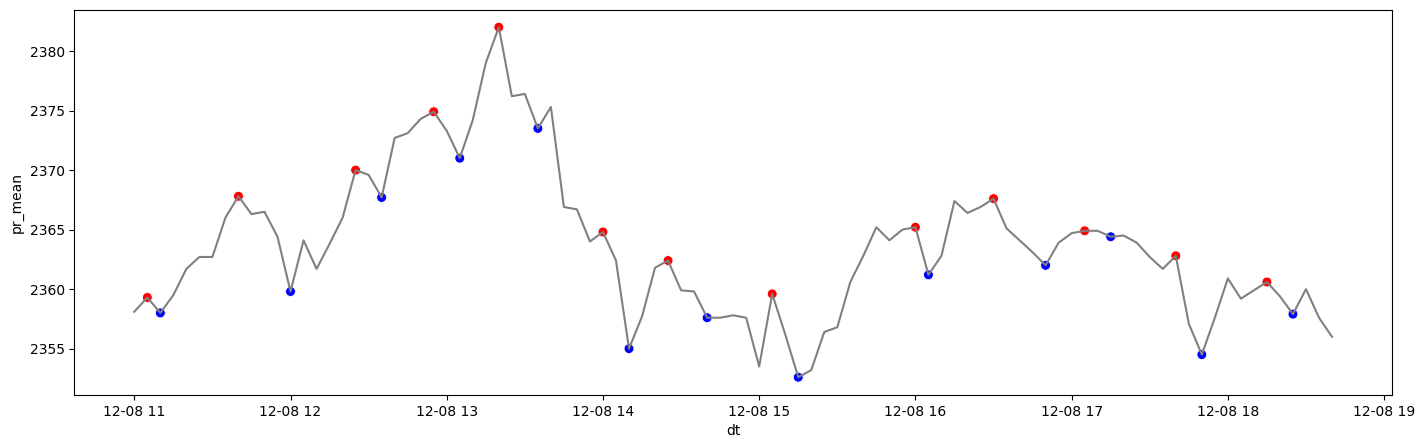

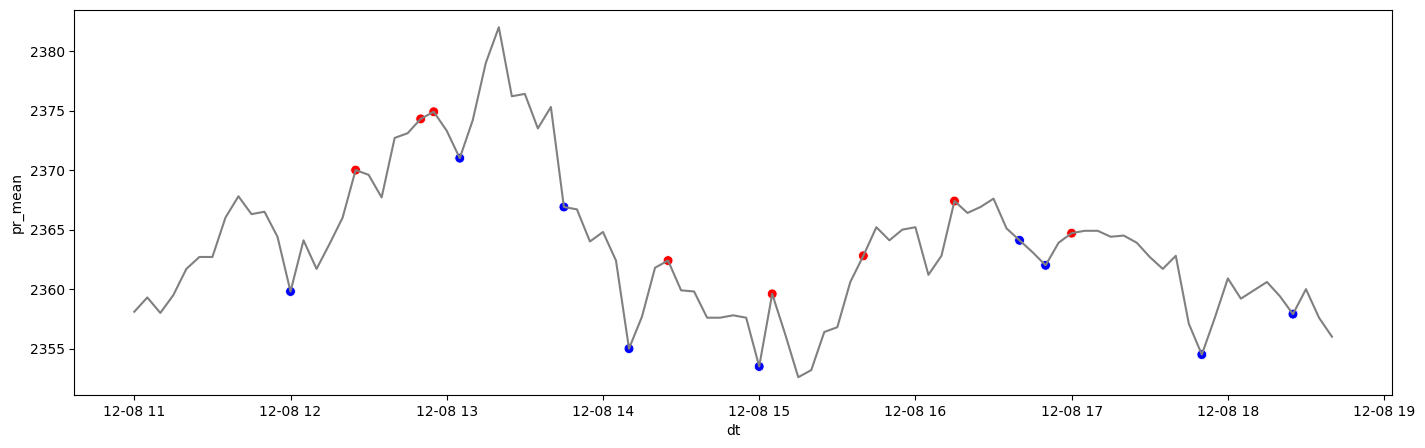

In [84]:
temp = test[['tradedate','tradetime','target','pr_mean']]
temp['pred'] = y_pred
temp['dt'] = temp[['tradedate','tradetime']].astype(str).apply(
    lambda row: row['tradedate'] + ' ' + row['tradetime'], axis=1)
temp['dt'] = pd.to_datetime(temp['dt'])


plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);
plt.show()

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('pred > 0')['pred'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('pred > 0')['dt'], y=temp.query('pred > 0')['pr_mean'], c=colors, s=50);
plt.show()

## Важность фичей

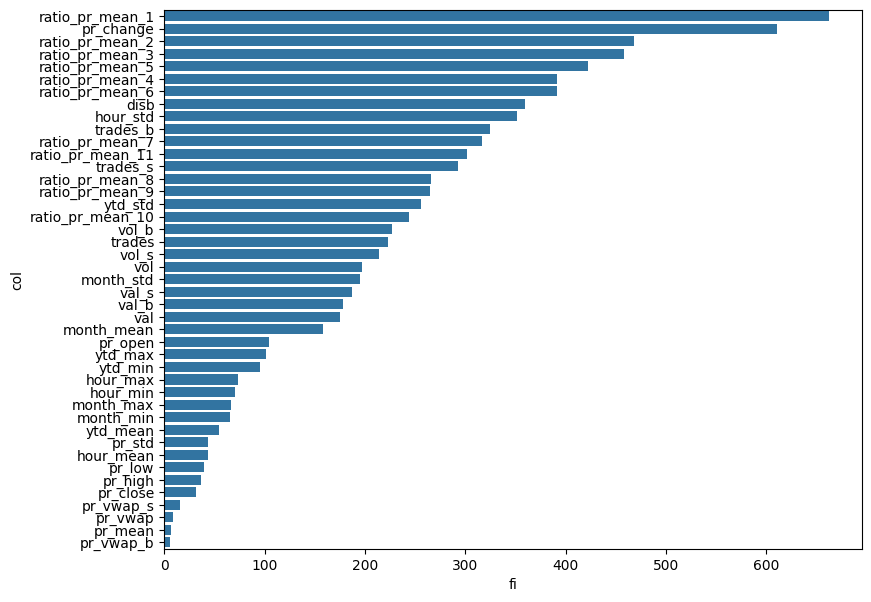

In [85]:
fi_df = pd.DataFrame({
    'col': X_train.columns,
    'fi': model.best_estimator_.feature_importances_
}).sort_values(by='fi', ascending=False)

plt.figure(figsize=(9,7))
sns.barplot(data=fi_df, y='col', x='fi', orient='h');

## Сохранение

In [45]:
today = datetime.today().strftime('%Y-%m-%d')
model.best_estimator_.booster_.save_model(f'../models/{today.replace("-","")}_model.lgb')